In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [37]:
df = pd.read_csv('mushrooms.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [39]:
pd.set_option('max_columns', None)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [40]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [41]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [42]:
df=df.drop(["veil-type"],axis=1)

In [43]:
df_div = pd.melt(df, "class", var_name="Characteristics")
df_div

,class,Characteristics,value
0,1,cap-shape,5
1,0,cap-shape,5
2,0,cap-shape,0
3,1,cap-shape,5
4,0,cap-shape,5
...,...,...,...
170599,0,habitat,2
170600,0,habitat,2
170601,0,habitat,2
170602,1,habitat,2


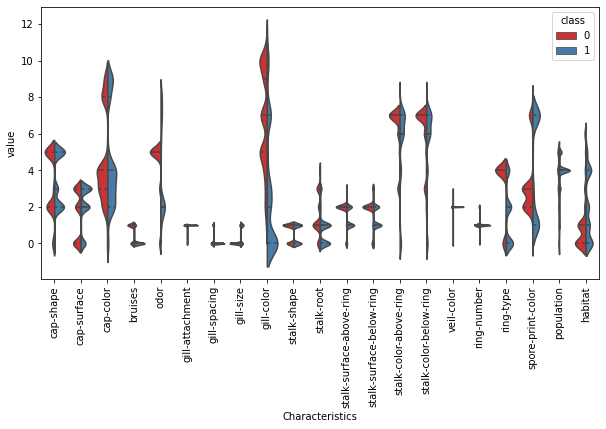

In [44]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

## Is the data balanced?

Text(0.5, 1.0, 'Number of poisonous/edible mushrooms (0=edible, 1=poisonous)')

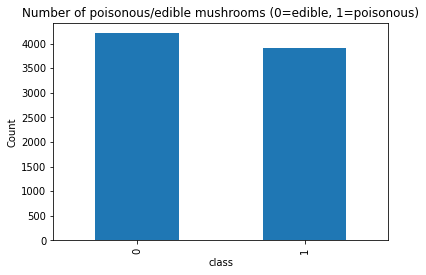

In [45]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)')

## The dataset is balanced :D

## Correlation between the variables:

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'class'),
  Text(0, 1.5, 'cap-shape'),
  Text(0, 2.5, 'cap-surface'),
  Text(0, 3.5, 'cap-color'),
  Text(0, 4.5, 'bruises'),
  Text(0, 5.5, 'odor'),
  Text(0, 6.5, 'gill-attachment'),
  Text(0, 7.5, 'gill-spacing'),
  Text(0, 8.5, 'gill-size'),
  Text(0, 9.5, 'gill-color'),
  Text(0, 10.5, 'stalk-shape'),
  Text(0, 11.5, 'stalk-root'),
  Text(0, 12.5, 'stalk-surface-above-ring'),
  Text(0, 13.5, 'stalk-surface-below-ring'),
  Text(0, 14.5, 'stalk-color-above-ring'),
  Text(0, 15.5, 'stalk-color-below-ring'),
  Text(0, 16.5, 'veil-color'),
  Text(0, 17.5, 'ring-number'),
  Text(0, 18.5, 'ring-type'),
  Text(0, 19.5, 'spore-print-color'),
  Text(0, 20.5, 'population'),
  Text(0, 21.5, 'habitat')])

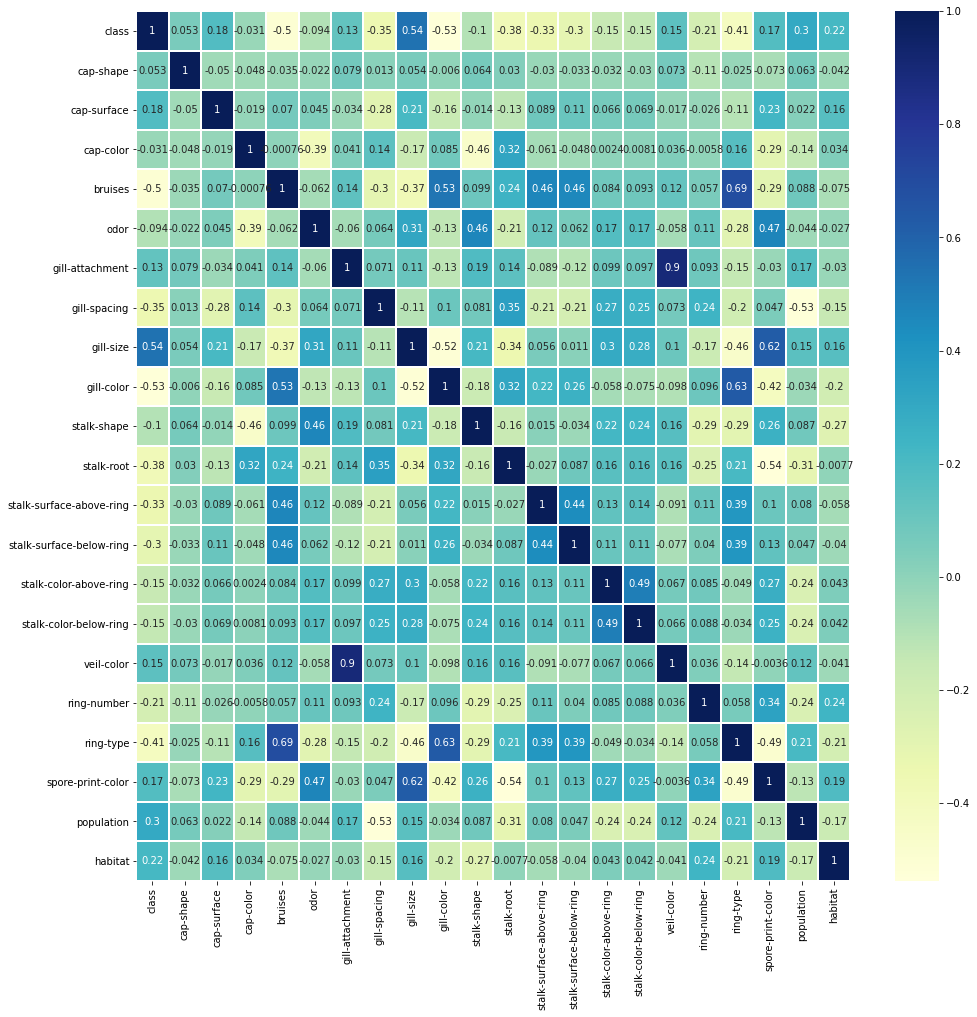

In [46]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),linewidths=.2,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

## Usually the least correlating variable is the most important one for classification.In this case, "gill-color" has -0.53 so let's look at it closely:

In [48]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


C:\Users\vova\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\vova\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


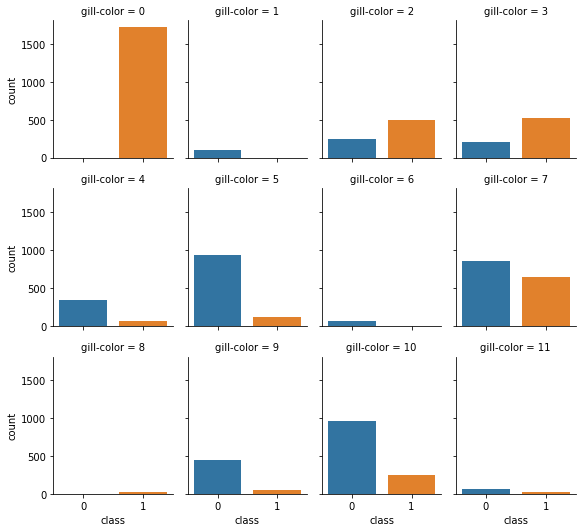

In [49]:
new_var=df[['class', 'gill-color']]
#new_var=new_var[new_var['gill-color']<=3.5]
sns.factorplot('class', col='gill-color', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=4);

In [50]:
df['gill-color'].value_counts()

0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64

## Model, predict and estimate the result:

In [51]:
X=df.drop(['class'], axis=1)
Y=df['class']

In [52]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)

## Decision tree classifier

### Classification tree predict a qualative response, in contrast to regression tree that predict quantitive response. Classification tree predicts the observation that belong to the most common occurring class from the training data for each region. In order to grow the classification tree the algorithm uses recursive binary splitting

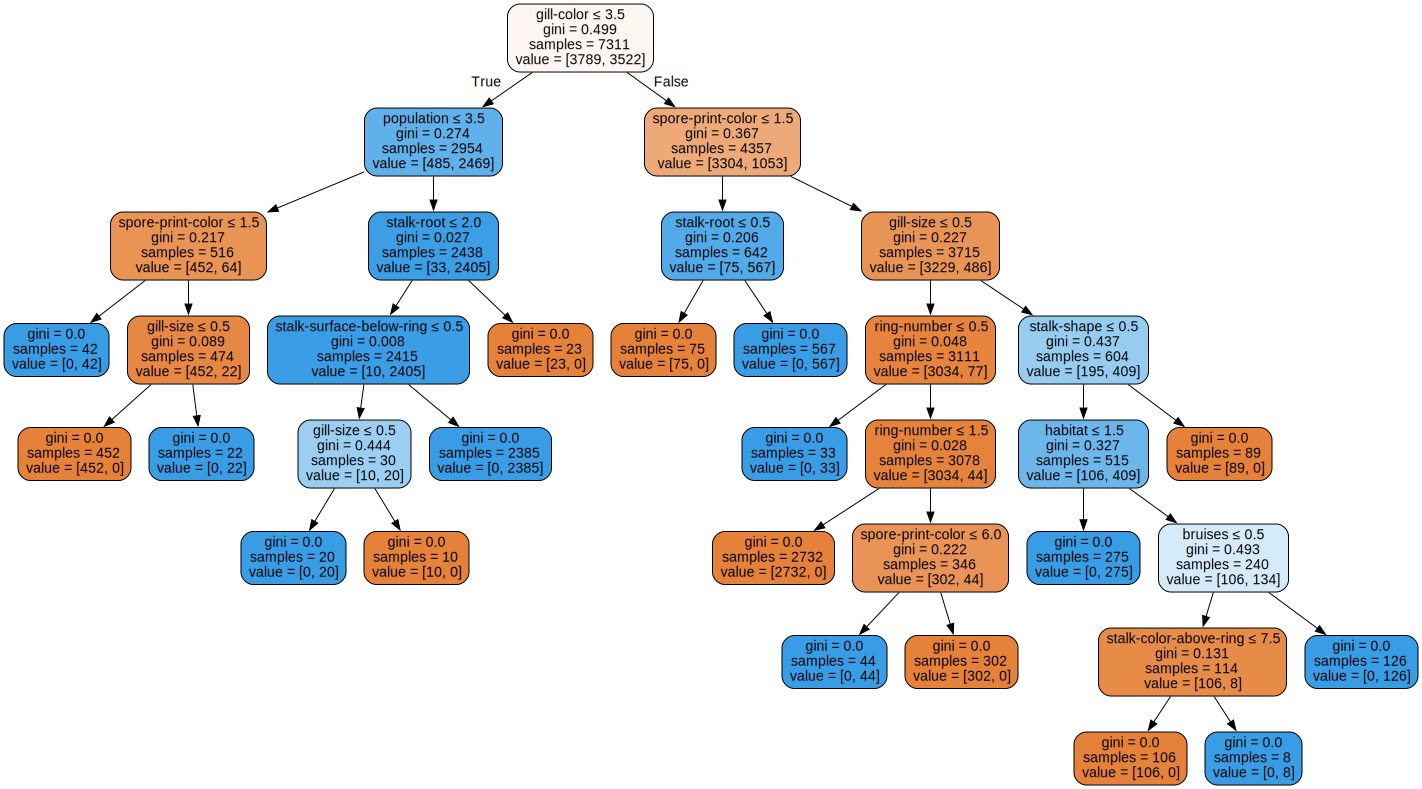

In [53]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

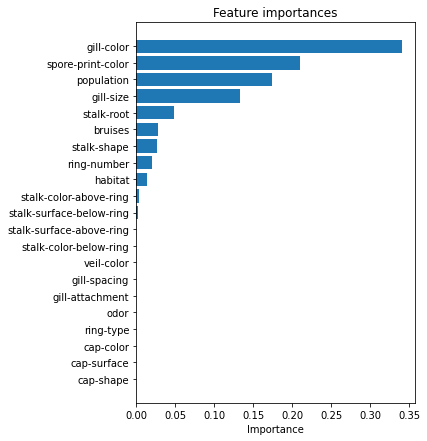

In [54]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [55]:
y_pred=clf.predict(X_test)

In [57]:
print("Decision Tree Classifier report \n", classification_report(Y_test, y_pred))


Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       419
           1       1.00      1.00      1.00       394

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



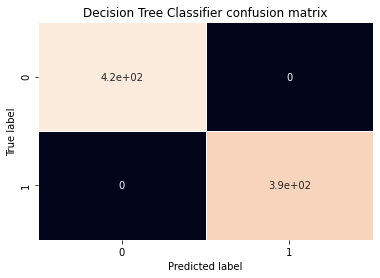

In [58]:
cfm=confusion_matrix(Y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

### Decision Tree Classifier resulted 100% accuracy and precision!! That's clearly overfitting! :...(

In [ ]:
# def computeCVAccuracy(X,y,folds):
# accuracy=[]
# foldAcc=[]
# depth=range(1,101)
# for i in depth: 
#     kf = KFold(len(X),n_folds=folds)
#     for train_index, test_index in kf:
#         X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, random_state=30)
#         clf = DecisionTreeClassifier(max_depth = i).fit(X_train, Y_train)
#         score=clf.score(X_test, Y_test)
#         accuracy.append(score)     
#     foldAcc.append(np.mean(accuracy))  
# return(foldAcc)

In [ ]:
#code edited but taken from: https://www.r-bloggers.com/practical-machine-learning-with-r-and-python-part-5/
# from sklearn.model_selection import KFold
# def computeCVAccuracy(X,y,folds):
#     accuracy=[]
#     foldAcc=[]
#     depth=range(1,101)
#     for i in depth: 
#         kf = KFold(len(X),n_folds=folds)
#     for train_index, test_index in kf:
#         X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, random_state=30)
#         clf = DecisionTreeClassifier(max_depth = i).fit(X_train, Y_train)
#         score=clf.score(X_test, Y_test)
#         accuracy.append(score)     
#     foldAcc.append(np.mean(accuracy))  
#     return(foldAcc)
    
    
# cvAccuracy=computeCVAccuracy(X,Y,folds=10)

# df1=pd.DataFrame(cvAccuracy)
# df1.columns=['10-fold cv Accuracy']
# df=df1.reindex(range(1,20))
# df.plot()
# plt.title("Decision Tree - 10-fold Cross Validation Accuracy vs Depth of tree")
# plt.xlabel("Depth of tree")
# plt.ylabel("Accuracy")
# plt.ylim([0.8,1])
# plt.xlim([0,20])

## Gaussian Naive Bayes (GaussianNB)

In [72]:
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)

In [73]:
y_pred_GNB=clf_GNB.predict(X_test)

In [74]:
cfm=confusion_matrix(Y_test, y_pred_GNB)

Text(0.5, 15.0, 'Predicted label')

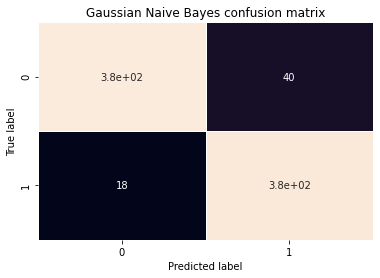

In [75]:
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Gaussian Naive Bayes confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [76]:
print("Test data- Gaussian Naive Bayes report \n", classification_report(Y_test, y_pred_GNB))

Test data- Gaussian Naive Bayes report 
               precision    recall  f1-score   support

           0       0.95      0.90      0.93       419
           1       0.90      0.95      0.93       394

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813



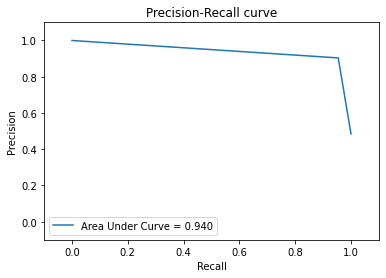

In [77]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_GNB)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.show()

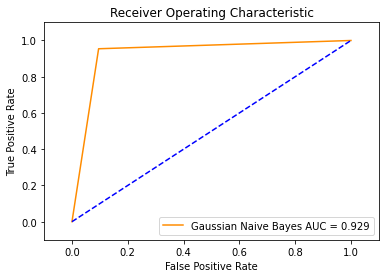

In [78]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

roc_curve_acc(Y_test, y_pred_GNB, "Gaussian Naive Bayes")